In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
np.set_printoptions(threshold=np.nan)

digits = datasets.load_digits()
X_digits = digits.data
Y_digits = digits.target

allSamples = np.arange(len(Y_digits))
np.random.shuffle(allSamples)

trainToTestRatio = 0.5
trainX=X_digits[allSamples[0:int(trainToTestRatio*len(allSamples))]]
trainY=Y_digits[allSamples[0:int(trainToTestRatio*len(allSamples))]]
testX=X_digits[allSamples[int(trainToTestRatio*len(allSamples)):]]
testY=Y_digits[allSamples[int(trainToTestRatio*len(allSamples)):]]

ann = MLPClassifier(hidden_layer_sizes=(64,48), # one hidden layer with 80 neurons
                    activation='logistic', # logistic sigmoid function
                    solver='adam', # stochastic gradient descent
                    alpha=1e-5, # regularization
                    verbose=False,
                    random_state=1,
                    learning_rate_init = 0.002)

ann.fit(trainX, trainY)
prediction = ann.predict(testX)

score = accuracy_score(testY, prediction)
print("Accuracy score: %0.2f" % score)

prediction_success=prediction-testY
hits = np.asarray(np.where(prediction_success==0))[0,:]
success_rate=len(hits)/len(testY)

print("Success rate: "+str(success_rate))
print("No of hits: "+str(len(hits)))
print("No of test samples: "+str(len(testY)))

print("Confusion matrix: ")
print(confusion_matrix(testY, prediction))
print("Shape of weight matrices: " + str([coef.shape for coef in ann.coefs_]))

print("ANN parameters: ")
ann.get_params()

Accuracy score: 0.97
Success rate: 0.9655172413793104
No of hits: 868
No of test samples: 899
Confusion matrix: 
[[94  0  0  0  0  0  1  0  0  0]
 [ 0 88  1  0  0  0  0  0  0  0]
 [ 0  3 89  1  0  0  0  0  0  0]
 [ 0  0  0 83  0  2  0  0  0  0]
 [ 0  1  0  0 77  0  0  0  2  1]
 [ 0  0  0  0  0 97  0  0  1  3]
 [ 1  1  0  0  1  0 90  0  0  0]
 [ 0  0  0  0  0  0  0 90  0  0]
 [ 0  8  0  0  0  0  0  0 84  1]
 [ 0  0  0  0  0  0  0  2  1 76]]
Shape of weight matrices: [(64, 64), (64, 48), (48, 10)]
ANN parameters: 


{'activation': 'logistic',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (64, 48),
 'learning_rate': 'constant',
 'learning_rate_init': 0.002,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

prediction: 5    target: 3


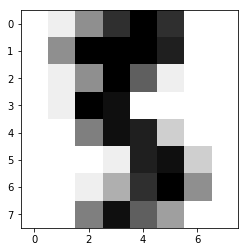

prediction: 1    target: 8


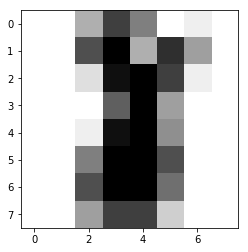

prediction: 9    target: 5


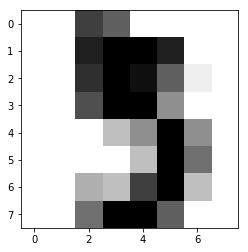

prediction: 3    target: 2


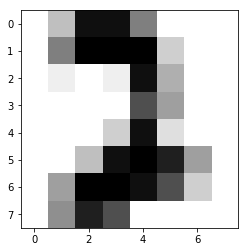

prediction: 6    target: 0


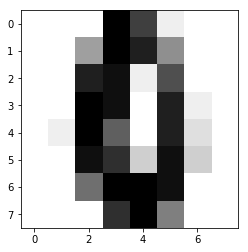

prediction: 8    target: 9


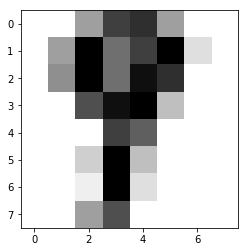

prediction: 9    target: 5


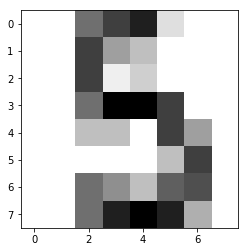

prediction: 8    target: 5


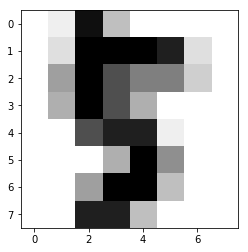

prediction: 9    target: 8


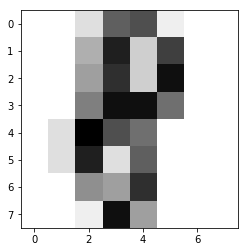

prediction: 1    target: 2


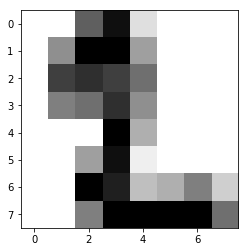

prediction: 1    target: 6


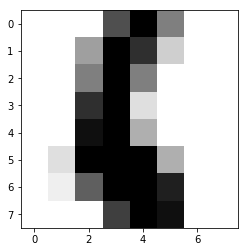

prediction: 9    target: 5


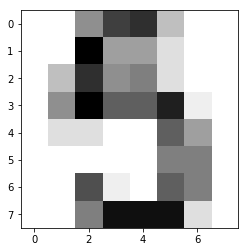

prediction: 1    target: 2


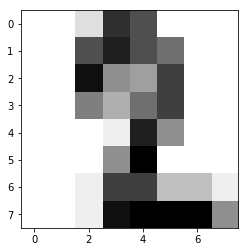

prediction: 1    target: 8


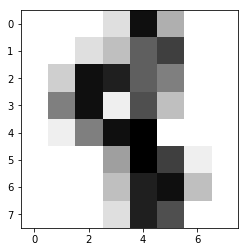

prediction: 8    target: 4


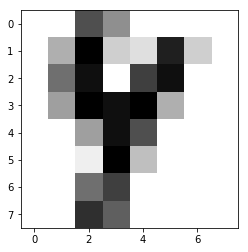

prediction: 8    target: 4


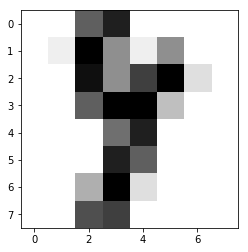

prediction: 1    target: 4


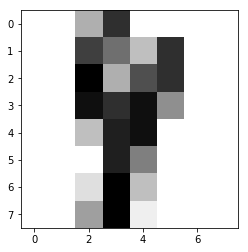

prediction: 1    target: 8


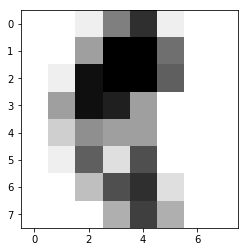

prediction: 1    target: 8


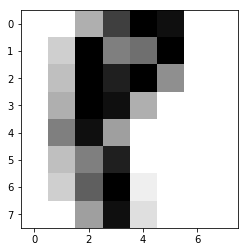

prediction: 4    target: 6


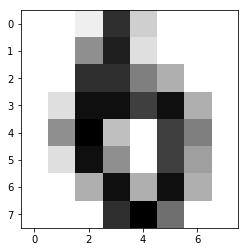

prediction: 1    target: 8


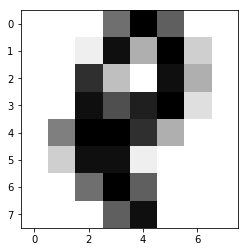

prediction: 1    target: 8


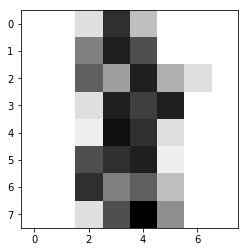

prediction: 5    target: 3


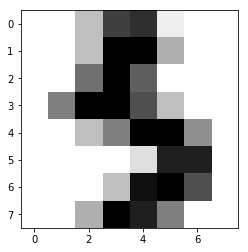

prediction: 7    target: 9


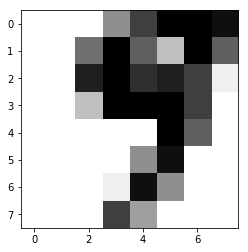

prediction: 1    target: 2


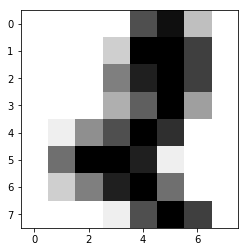

prediction: 2    target: 1


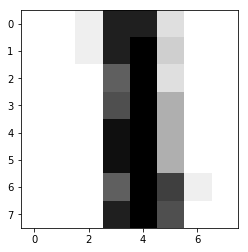

prediction: 7    target: 9


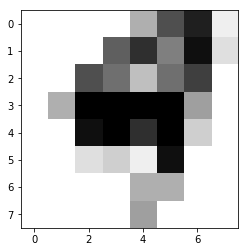

prediction: 0    target: 6


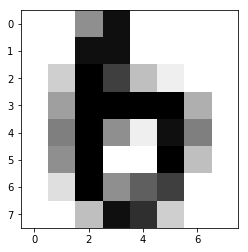

prediction: 9    target: 4


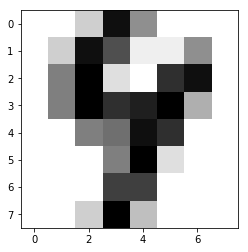

prediction: 1    target: 8


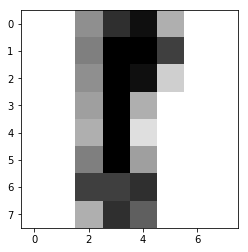

prediction: 1    target: 8


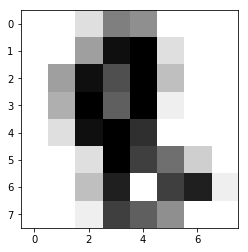

In [23]:
import matplotlib.pyplot as plt
for x in range(len(testY)):
    if(prediction[x]!=testY[x]):
        plt.imshow(testX[x].reshape(8,8), cmap=plt.cm.gray_r)
        print("prediction: "+str(prediction[x])+"    target: "+str(testY[x]))
        plt.show()